## ✅ Langkah 1 – Import Library

In [28]:
# Install library jika belum ada
!pip install Sastrawi wordcloud --quiet

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

## Load Dataset & batasi 50 kolom pertama

In [29]:
df = pd.read_csv('ujaran_dataset.csv')

# Ambil hanya 100 baris pertama
df = df.head(50)

# Preprocessing
df['clean_text'] = df['tweet'].astype(str).apply(preprocess)

df.head()

,class,tweet,clean_text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as woman you shouldn complain ...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dats cold tyga dwn bad for cuffin...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbaby life you ever f...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt anderson viva based she look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts the shit you hear about me m...


## Membuat dua label untuk Dataset

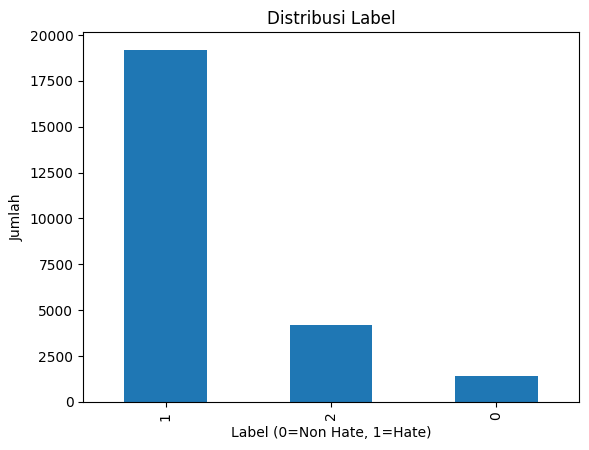

In [9]:
df['class'].value_counts().plot(kind='bar')
plt.title('Distribusi Label')
plt.xlabel('Label (0=Non Hate, 1=Hate)')
plt.ylabel('Jumlah')
plt.show()

## ✅ Langkah 2 – Preprocessing Teks

In [30]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_id = set(stopwords.words('english'))

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

def preprocess(text):
    # lowercase
    text = text.lower()

    # hapus angka & tanda baca
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # tokenisasi
    tokens = nltk.word_tokenize(text)

    # hapus stopword + kata 1 huruf
    tokens = [t for t in tokens if t not in stopwords_id and len(t) > 1]

    # gabung kembali
    text = ' '.join(tokens)

    # stemming
    text = stemmer.stem(text)

    return text

# ✅ pastikan kolom yang dipakai adalah 'tweet'
df['clean_text'] = df['tweet'].astype(str).apply(preprocess)

df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,class,tweet,clean_text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman complain cleaning house ...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dats cold tyga dwn bad cuffin dat...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbaby life ever fuck ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt anderson viva based look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...


## ✅ Langkah 3 – Representasi Fitur (Bag of Words)

In [35]:
# Langkah 3: Representasi BoW
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['class']

##  ✅ Langkah 4 – Train Model Naive Bayes

In [36]:
# Langkah 4: Training Model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)


## ✅ Langkah 5 – Evaluasi Model

In [37]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))


Confusion Matrix:
 [[10]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


## ✅ Langkah 6 – Visualisasi Distribusi Label & Word Cloud

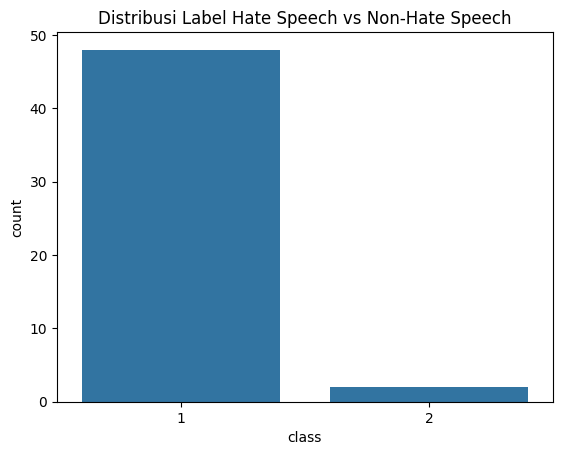

In [39]:
# Visualisasi Distribusi Label
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['class'])
plt.title("Distribusi Label Hate Speech vs Non-Hate Speech")
plt.show()

In [44]:
# Word Cloud (khusus teks hate speech)
from wordcloud import WordCloud

hate_text = ' '.join(df[df['class']==1]['clean_text'])

wordcloud = WordCloud(width=800, height=400).generate(hate_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud Ujaran Kebencian")
plt.show()